In [1]:
%load_ext autoreload
%autoreload 2

import sys

path = "/app"
sys.path.insert(1, path)
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
from tqdm import tqdm
import numpy as np
from face_lib.datasets import IJBDataset, IJBATest, IJBCTemplates
from face_lib.evaluation.aggregation import aggregate_templates

In [2]:
cache_dir = "/app/cache"
uncertainty_strategy = "PFE"
dataset_path = "/app/data/big"
protocol_path = "/app/data/test1"

testset = IJBDataset(dataset_path)
image_paths = testset["abspath"].values

features_path = Path(cache_dir) / f"{uncertainty_strategy}_features.pickle"
uncertainty_path = Path(cache_dir) / f"{uncertainty_strategy}_uncertainty.pickle"

with open(features_path, "rb") as f:
    feature_dict = pickle.load(f)
with open(uncertainty_path, "rb") as f:
    uncertainty_dict = pickle.load(f)

In [3]:
tester = IJBCTemplates(image_paths, feature_dict, uncertainty_dict)
tester.init_proto(protocol_path)

normalize = True
aggregate_templates(tester.enroll_templates(), "PFE", normalize=normalize)
aggregate_templates(tester.verification_templates(), "first", normalize=normalize)

In [6]:
verification_sigma_sq = [t.sigma_sq for t in tester.verification_templates()]
verification_sigma_sq = np.array(verification_sigma_sq)

In [56]:
K = 50
verification_sigma_sq_sorted = np.sort(verification_sigma_sq, axis=1)
verification_sigma_sq_top_K = verification_sigma_sq_sorted[:, -K:]

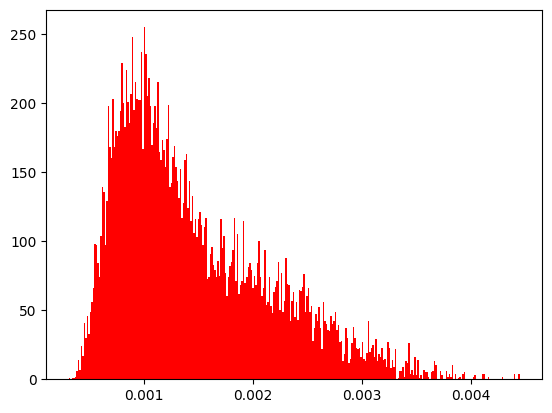

In [57]:
verification_sigma_sq_top_K_avg = np.mean(verification_sigma_sq_top_K, axis=1)
plt.hist(verification_sigma_sq_top_K[:, 1], bins=300, color="red");

In [58]:
M = 500
noisy_inputs_idx = np.argsort(verification_sigma_sq_top_K_avg)[-M:]
verification_sigma_sq_top_K_mean = np.mean(
    verification_sigma_sq_top_K[noisy_inputs_idx, :], axis=0
)

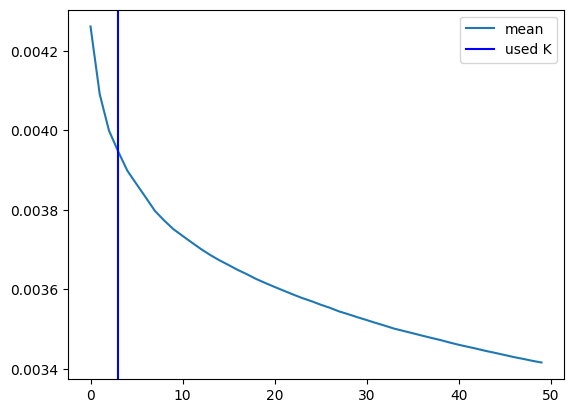

In [64]:
plt.plot(np.arange(K)[::-1], verification_sigma_sq_top_K_mean, label="mean")
plt.axvline(x=3, color="b", label="used K")
plt.legend()

In [14]:
verification_sigma_sq.shape

(19467, 512)

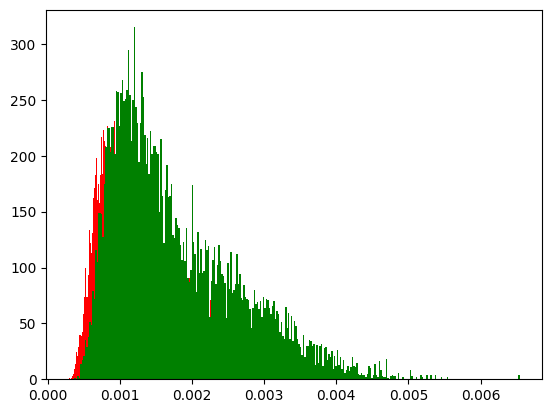

In [18]:
# plt.hist(verification_sigma_sq_top_K[:,0], bins=300);
plt.hist(verification_sigma_sq_top_K[:, 1], bins=300, color="red")
plt.hist(verification_sigma_sq_top_K[:, 99], bins=300, color="green");